# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Brady Monks

### GitHub Repo URL: https://github.com/bradymonks/article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [1]:
import requests
article_page = requests.get('https://chiefswire.usatoday.com/lists/chiefs-bengals-week-13-takeaways-patrick-mahomes-isiah-pacheco-joshua-williams-defensive-line/')
article_html = article_page.text

import pickle
with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [2]:
from bs4 import BeautifulSoup
parser = 'html.parser'
soup = BeautifulSoup(article_html, parser)
article_element = soup.find('article')
text_article = article_element.get_text()
print(article_element.get_text())














4 takeaways from Chiefs' Week 13 loss to Bengals



			Share this article		

				488 shares
		


 
					share				



 
					tweet				



 
				text			



 
				email			



 
				link			



 




 
				on Facebook			



 
				on Twitter			



 
				via text message			



 
				on LinkedIn			



 
				via email			



 
				https://chiefswire.usatoday.com/lists/chiefs-bengals-week-13-takeaways-patrick-mahomes-isiah-pacheco-joshua-williams-defensive-line/			










Charles Goldman 



December 5, 2022 6:45 am CT








The Kansas City Chiefs spent all offseason stewing over their disappointing loss in the AFC title game, but it didn’t do them any good. When they had their chance for redemption in Week 13, they dropped their first game since Week 6 and their third consecutive game to the Cincinnati Bengals.
It was another three-point loss, marred by mistakes and turnovers and perfectly reminiscent of the last two losses to this team. It makes you wonder what the team really

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [3]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())

non_ws_tokens = []
for token in doc:
    if not token.is_space:
        non_ws_tokens.append(token)

def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in doc if we_care_about(token)]
int_tok_lower = []
for word in interesting_tokens:
    int_tok_lower.append(word.lower_)

from collections import Counter  
    
token_freq = Counter(map(str,int_tok_lower))
print(token_freq.most_common(5))

[('game', 14), ('chiefs', 13), ('bengals', 11), ('week', 9), ('13', 7)]


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [4]:
interesting_lemmas = [token.lemma_ for token in doc if we_care_about(token)]

int_lem_lower = []
for word in interesting_tokens:
    int_lem_lower.append(word.lower_)

lemma_freq = Counter(int_lem_lower)
print(lemma_freq.most_common(5))

[('game', 14), ('chiefs', 13), ('bengals', 11), ('week', 9), ('13', 7)]


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [5]:
sentences = list(doc.sents) 

token_words = set()
for token, freq in token_freq.most_common(5):
    token_words.add(token)

tscores = []
for sentence in sentences:
    tcount = 0
    wcount = 0
    for token in sentence:
        if token.lemma_.lower() in token_words:
            tcount += 1
        wcount +=1
    tscores.append(round(lcount/wcount,2))
print(tscores)


[0.07, 0.07, 0.21, 0.0, 0.1, 0.21, 0.05, 0.03, 0.0, 0.0, 0.0, 0.1, 0.12, 0.0, 0.05, 0.06, 0.0, 0.1, 0.05, 0.0, 0.11, 0.15, 0.06, 0.11, 0.0, 0.0, 0.0, 0.03, 0.0, 0.04, 0.05, 0.0, 0.0, 0.0, 0.04, 0.05, 0.0, 0.08, 0.04, 0.1, 0.04, 0.05, 0.08, 0.04, 0.0, 0.0, 0.02, 0.0, 0.0]


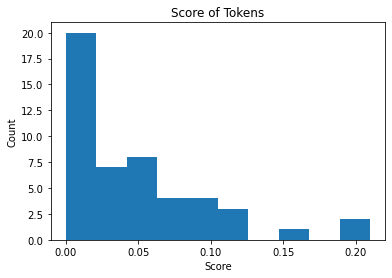

In [6]:
import matplotlib.pyplot as plt
plt.hist(tscores)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Score of Tokens')
plt.show()

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [7]:
sentences = list(doc.sents) 

lemmas_words = set()
for lemma, freq in lemma_freq.most_common(5):
    lemmas_words.add(lemma)

lscores = []
for sentence in sentences:
    lcount = 0
    wcount = 0
    for token in sentence:
        if token.lemma_.lower() in lemmas_words:
            lcount += 1
        wcount +=1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    lscores.append(round(lcount/wcount,2))
print(lscores)


[0.07, 0.07, 0.21, 0.0, 0.1, 0.21, 0.05, 0.03, 0.0, 0.0, 0.0, 0.1, 0.12, 0.0, 0.05, 0.06, 0.0, 0.1, 0.05, 0.0, 0.11, 0.15, 0.06, 0.11, 0.0, 0.0, 0.0, 0.03, 0.0, 0.04, 0.05, 0.0, 0.0, 0.0, 0.04, 0.05, 0.0, 0.08, 0.04, 0.1, 0.04, 0.05, 0.08, 0.04, 0.0, 0.0, 0.02, 0.0, 0.0]


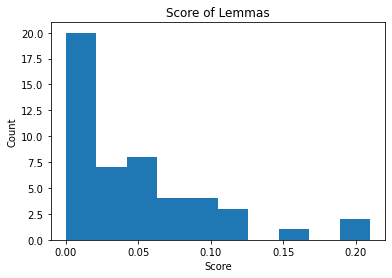

In [8]:
import matplotlib.pyplot as plt
plt.hist(lscores)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Score of Lemmas')
plt.show()

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): .1
* Cutoff Score (lemmas): .1

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [9]:
lscores = []
lsummarys = []
lemma_cutoff = 0.1
for sentence in sentences:
    lcount = 0
    wcount = 0
    for token in sentence:
        if token.lemma_.lower() in lemmas_words:
            lcount += 1
        wcount +=1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    lscores.append(round(lcount/wcount,2))
    if lcount / wcount > lemma_cutoff:
        lsummarys.append(1)
    else: 
        lsummarys.append(0)


In [10]:
summary = []
lsent = [sent.text.strip() for sent in sentences]
count = 0
for index, score in enumerate(lsummarys):
    if score == 1:
        summary.append(lsent[index])
        count +=1
print(summary)

['When they had their chance for redemption in Week 13, they dropped their first game since Week 6 and their third consecutive game to the Cincinnati Bengals.', 'Buy Chiefs Tickets\nWhat else did we learn about the Chiefs in their Week 13 loss?', 'They’d been doing it and daring the Chiefs to run the ball all game long.', 'Defensive line play must be better\n\n\nSam Greene-USA TODAY Sports\nThe Chiefs’ defensive line didn’t meet the standard in Week 13.', 'They were playing a Bengals team that heading into Week 13 had given up the third-most sacks in the NFL season (33).', 'The Bengals O-Line is playing better as of late, allowing just four sacks in its three games leading up to Week 13.', 'This is a group that hasn’t recorded fewer than three sacks in a game since Week 6.']


In [11]:
text_summary = ' '.join(summary)
print(text_summary)

When they had their chance for redemption in Week 13, they dropped their first game since Week 6 and their third consecutive game to the Cincinnati Bengals. Buy Chiefs Tickets
What else did we learn about the Chiefs in their Week 13 loss? They’d been doing it and daring the Chiefs to run the ball all game long. Defensive line play must be better


Sam Greene-USA TODAY Sports
The Chiefs’ defensive line didn’t meet the standard in Week 13. They were playing a Bengals team that heading into Week 13 had given up the third-most sacks in the NFL season (33). The Bengals O-Line is playing better as of late, allowing just four sacks in its three games leading up to Week 13. This is a group that hasn’t recorded fewer than three sacks in a game since Week 6.


9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [12]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc_sum = nlp(text_summary)
print("The polarity of this summary is",round(doc_sum._.blob.polarity,4), "There are",count,"sentences.")  


The polarity of this summary is -0.0636 There are 7 sentences.


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [13]:
lscores = []
lsummarys = []
lemma_cutoff = 0.1
for sentence in sentences:
    lcount = 0
    wcount = 0
    for token in sentence:
        if token.lemma_.lower() in lemmas_words:
            lcount += 1
        wcount +=1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    lscores.append(round(lcount/wcount,2))
    if lcount / wcount > lemma_cutoff:
        lsummarys.append(1)
    else: 
        lsummarys.append(0)


In [14]:
summary = []
lsent = [sent.text.strip() for sent in sentences]
for index, score in enumerate(lsummarys):
    if score == 1:
        summary.append(lsent[index])

print(summary)

['When they had their chance for redemption in Week 13, they dropped their first game since Week 6 and their third consecutive game to the Cincinnati Bengals.', 'Buy Chiefs Tickets\nWhat else did we learn about the Chiefs in their Week 13 loss?', 'They’d been doing it and daring the Chiefs to run the ball all game long.', 'Defensive line play must be better\n\n\nSam Greene-USA TODAY Sports\nThe Chiefs’ defensive line didn’t meet the standard in Week 13.', 'They were playing a Bengals team that heading into Week 13 had given up the third-most sacks in the NFL season (33).', 'The Bengals O-Line is playing better as of late, allowing just four sacks in its three games leading up to Week 13.', 'This is a group that hasn’t recorded fewer than three sacks in a game since Week 6.']


In [15]:
text_summary = ' '.join(summary)
print(text_summary)

When they had their chance for redemption in Week 13, they dropped their first game since Week 6 and their third consecutive game to the Cincinnati Bengals. Buy Chiefs Tickets
What else did we learn about the Chiefs in their Week 13 loss? They’d been doing it and daring the Chiefs to run the ball all game long. Defensive line play must be better


Sam Greene-USA TODAY Sports
The Chiefs’ defensive line didn’t meet the standard in Week 13. They were playing a Bengals team that heading into Week 13 had given up the third-most sacks in the NFL season (33). The Bengals O-Line is playing better as of late, allowing just four sacks in its three games leading up to Week 13. This is a group that hasn’t recorded fewer than three sacks in a game since Week 6.


11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [16]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc_sum = nlp(text_summary)
print("The polarity of this summary is",round(doc_sum._.blob.polarity,4), "There are",count,"sentences.")  

The polarity of this summary is -0.0636 There are 7 sentences.


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

In [17]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
text_article1 = ' '.join(text_article)
doc_article = nlp(text_article1)
doc_article._.blob.polarity  

-0.25

#### The polarity score for the entire article jumps to -0.25 from -0.063. I think this is due to the fact of that the words we used to help with the summary have more of a positive enhancer to them. When we look at the entire article there will be other words that are more neutral or negative that don't get put into the summary, causing the entire article to be more negative. 

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

#### There's no difference